**Problem Statement**

Sebuah Bank sedang menghadapi permasalahan dimana sejumlah customer meninggalkan bank tersebut. Terdapat sebuah dataset 10000 nasabah bank yang diharapkan dapat menjadi pencerahan akan alasan mereka meinggalkan bank tersebut. Sebagai seorang Data Scientist kami diminta untuk menganalisis pola, serta membangun model prediktif untuk mengidentifikasi pelanggan yang mungkin akan meninggalkan bank. Dengan demikian, bank berharap dapat mengurangi tingkat churn dan meningkatkan kepuasan pelanggan.

Adapun beberapa variabel yang ada didalam dataset berupa :
1. RowNumber        : Nomor baris
2. CustomerId       : ID Nasabah
3. Surname          : Nama Belakang Nasabah
4. CreditScore      : Skor Kredit Nasabah
5. Geography        : Lokasi Nasabah
6. Gender           : Jenis Kelamin Nasabah
7. Age              : Usia Nasabah
8. Tenure           : Lama Menjadi Nasabah
9. Balance          : Saldo Nasabah
10. NumOfProducts   : Jumlah Produk yang Dimiliki
11. HasCrCard       : Memiliki Kartu Kredit
12. IsActiveMember  : Member Aktif Bank
13. EstimatedSalary : Perkiraan Gaji Nasabah
14. Exited          : Meninggalkan Bank

Untuk mencapai tujuan tersebut, Data Scientist harus bisa membuat sebuah algoritma untuk memprediksi apakah seorang nasabah berpotensi untuk meninggalkan bank berdasarkan sejumlah data mereka seperti skor kredit, lokasi, gender, umur, saldo, gaji, dan lain-lain. Berdasarkan inputan tersebut mesin harus dapat memprediksi apakah nasabah tersebut akan meninggalkan bank. Berdasarkan output tersebut, dapat dikatakan bahwa problem dari case ini adalah **Binary Classification** dimana hanya terdapat 1 label yang kemungkinan value nya adalah Binary (2 kemungkinan).

**Import Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('data_C.csv')
df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,157138,15638646,Chinweike,628.0,Spain,Female,50.0,4,160133.08,1,1,1,653.53,0
1,1,116144,15695825,Onwumelu,710.0,Spain,Male,34.0,8,0.00,2,1,1,72993.73,0
2,2,145603,15592765,Marks,663.0,France,Female,23.0,8,125470.81,1,1,1,174536.17,0
3,3,79929,15807525,Onyemachukwu,644.0,Spain,Male,45.0,8,0.00,2,0,1,28690.90,0
4,4,52554,15611551,Hill,627.0,Spain,Male,23.0,5,0.00,2,1,0,134483.07,0


**Explore New Dataset**


Dataset Churn_Modelling memiliki 41257 data dengan 15 variabel (termasuk input dan outputnya)

In [ ]:
df.shape

(41258, 15)

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41258 non-null  int64  
 1   id               41258 non-null  int64  
 2   CustomerId       41258 non-null  int64  
 3   Surname          41258 non-null  object 
 4   CreditScore      41246 non-null  float64
 5   Geography        41258 non-null  object 
 6   Gender           41258 non-null  object 
 7   Age              41258 non-null  float64
 8   Tenure           41258 non-null  int64  
 9   Balance          41258 non-null  float64
 10  NumOfProducts    41258 non-null  int64  
 11  HasCrCard        41258 non-null  int64  
 12  IsActiveMember   41258 non-null  int64  
 13  EstimatedSalary  41258 non-null  float64
 14  churn            41258 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


In [ ]:
#check data variation
df.nunique()

Unnamed: 0         41258
id                 41258
CustomerId         13212
Surname             2272
CreditScore          444
Geography              3
Gender                 2
Age                   71
Tenure                11
Balance            11410
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary    20841
churn                  2
dtype: int64

Terdapat 12 Missing value pada kolom 'CreditScore'. Hal ini berarti bahwa perlu dilakukan imputing value untuk data yang missing ini setelah proses splitting dataset

In [ ]:
#Check Missing Value
df.isnull().sum()

Unnamed: 0          0
id                  0
CustomerId          0
Surname             0
CreditScore        12
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
churn               0
dtype: int64

Terlihat bahwa terdapat imbalance data dimana data nasabah yang meninggalkan bank jauh lebih sedikit dimana data nasabah yang bertahan dengan perbandingan 1 : 4

In [ ]:
df['churn'].value_counts()

churn
0    32410
1     8848
Name: count, dtype: int64

In [ ]:
df.duplicated().sum()

0

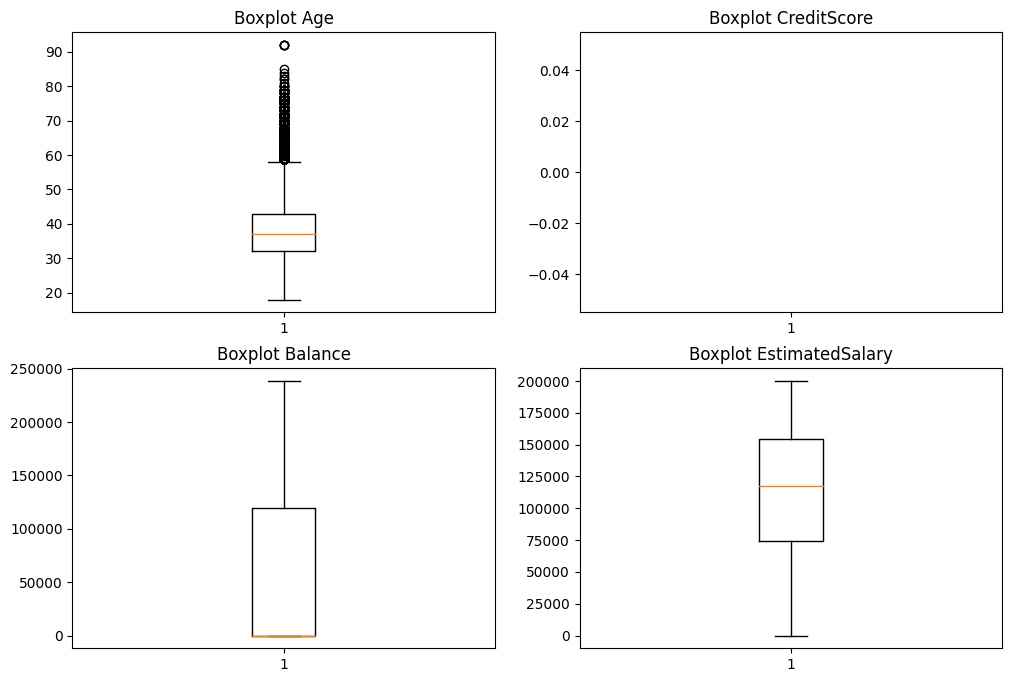

In [ ]:
# Membuat empat boxplot terpisah untuk setiap kolom
plt.figure(figsize=(12, 8))

# Boxplot untuk kolom 'Age'
plt.subplot(2, 2, 1)
plt.boxplot(df['Age'])
plt.title('Boxplot Age')

# Boxplot untuk kolom 'CreditScore'
plt.subplot(2, 2, 2)
plt.boxplot(df['CreditScore'])
plt.title('Boxplot CreditScore')

# Boxplot untuk kolom 'Balance'
plt.subplot(2, 2, 3)
plt.boxplot(df['Balance'])
plt.title('Boxplot Balance')

# Boxplot untuk kolom 'EstimatedSalary'
plt.subplot(2, 2, 4)
plt.boxplot(df['EstimatedSalary'])
plt.title('Boxplot EstimatedSalary')

plt.show()

Untuk kolom Age terdapat beberapa nilai yang dianggap sebagai outliers yakni umur nasabah yang diatas 66 tahun (lansia). Pertanyaan berikutnya adalah apakah justru para lansia ini memiliki potensi yang besar untuk meninggalkan bank? Berdasarkan hasil pengecekan, ternyata sebagian besar lansia memilih untuk tetap menjadi nasabah bank dengan perbandingan 394 nasabah lansia yang menetap dibandingkan dengan 91 nasabah lansia yang meninggalkan bank. Perbandingan ini menarik untuk diperhatikan jika dibandingkan dengan perbandingan keseluruhan data, di mana perbandingan nasabah yang meninggalkan bank (Exited) adalah 4:1 dibandingkan dengan nasabah yang tetap. Ini menunjukkan bahwa nasabah lansia memiliki kecenderungan yang lebih tinggi untuk tetap menjadi nasabah bank daripada kelompok umur lainnya. Sehingga kecurigaan saya bahwa lansia lebih banyak meninggalkan bank **tidak terbukti**.

In [ ]:
#Check 'Age' Outliers
mean = df.Age.mean()
std = df.Age.std()
Tmin = mean - (3 * std)
Tmax = mean + (3 * std)

filtered_values = df[(df['Age'] < Tmin) | (df['Age'] > Tmax)]['Age'].values
print(filtered_values)
print(f'Jumlah tuple outliers = ',len(filtered_values))
print("===================================================================================")
print("======= Finding out whether more elderly individuals are leaving the bank? ========")
print("===================================================================================")

a = df[df['Age'].isin(filtered_values)]
b = df[df.index.isin(a.index)]
print(b['churn'].value_counts())

[66. 66. 77. 67. 71. 79. 66. 69. 67. 80. 67. 74. 67. 72. 67. 69. 71. 66.
 67. 67. 70. 66. 66. 67. 80. 67. 67. 74. 67. 66. 69. 71. 67. 70. 67. 69.
 71. 70. 66. 66. 83. 67. 72. 78. 79. 70. 77. 68. 66. 66. 66. 69. 67. 67.
 67. 66. 66. 71. 70. 70. 77. 67. 66. 73. 68. 66. 72. 66. 79. 77. 66. 67.
 67. 75. 73. 69. 69. 67. 71. 69. 68. 72. 67. 78. 71. 71. 67. 75. 73. 67.
 71. 68. 66. 69. 76. 74. 67. 77. 67. 70. 66. 71. 77. 71. 69. 77. 67. 67.
 71. 82. 66. 78. 66. 74. 71. 66. 66. 69. 66. 68. 66. 67. 66. 67. 92. 71.
 71. 71. 66. 71. 66. 71. 66. 72. 74. 66. 72. 69. 71. 66. 66. 71. 68. 74.
 66. 92. 68. 67. 67. 69. 66. 68. 69. 71. 72. 69. 72. 71. 70. 67. 69. 71.
 71. 68. 74. 66. 72. 67. 71. 73. 66. 67. 67. 66. 73. 67. 67. 67. 68. 66.
 70. 66. 70. 71. 66. 67. 77. 67. 66. 74. 71. 67. 77. 72. 66. 71. 66. 67.
 75. 67. 67. 68. 71. 67. 66. 66. 66. 72. 68. 72. 69. 74. 67. 77. 74. 66.
 71. 66. 68. 66. 67. 67. 66. 66. 71. 71. 72. 67. 66. 71. 66. 67. 76. 71.
 68. 69. 70. 69. 66. 79. 72. 69. 67. 67. 69. 67. 66

Berdasarkan nilai Outliers dari Credit Score dimana skor yang lebih kecil daripada 360 seluruhnya adalah nasabah yang meninggalkan bank. Hal ini dapat memberikan insight bahwa nasabah yang jarang melakukan kredit berpotensi besar untuk meninggalkan bank. Dari sini saya dapat memberikan rekomendasi bahwa pihak bank harus dapat meningkatkan ketertarikan nasabah untuk melakukan kredit pada bank sehingga dapat menekan churn rate nasabah seperti:

1. Bank dapat mengembangkan produk kredit yang sesuai dengan kebutuhan dan preferensi nasabah, serta menawarkan suku bunga yang kompetitif dan fleksibel.

2. Memberikan edukasi dan informasi yang jelas mengenai manfaat dan proses pengajuan kredit kepada nasabah potensial dapat meningkatkan kepercayaan dan minat mereka terhadap produk tersebut.

3. Menggunakan strategi pemasaran yang tepat, seperti iklan digital, promosi melalui media sosial, dan kampanye pemasaran yang terfokus, dapat membantu meningkatkan kesadaran nasabah terhadap produk kredit bank.

4. Memberikan pelayanan pelanggan yang baik dan responsif dapat membantu menciptakan pengalaman positif bagi nasabah yang mengajukan kredit, sehingga meningkatkan loyalitas dan retensi nasabah.


NOTES:
Disini saya memutuskan untuk membiarkan nilai outliers yang ada karena bagaimanapun model yang nanti akan saya bangun membutuhkan data outliers agar model akan tahan dengan data outliers nantinya.

In [ ]:
#Check 'CreditScore' Outliers
mean = df.CreditScore.mean()
std = df.CreditScore.std()
Tmin = mean - (3 * std)
Tmax = mean + (3 * std)

filtered_values = df[(df['CreditScore'] < Tmin) | (df['CreditScore'] > Tmax)]['CreditScore'].values
print(filtered_values)
print(f'Jumlah tuple outliers = ',len(filtered_values))
print("===================================================================================")
print("===== Finding out whether less credit score individuals are leaving the bank? =====")
print("===================================================================================")

a = df[df['CreditScore'].isin(filtered_values)]
b = df[df.index.isin(a.index)]
print(b['churn'].value_counts())

[415. 413. 414. 363. 367. 412. 413. 411. 383. 415. 412. 408. 416. 411.
 411. 416. 411. 414. 365. 411. 350. 365. 376. 408. 350. 359. 405. 411.
 414. 412. 411. 359.]
Jumlah tuple outliers =  32
===== Finding out whether less credit score individuals are leaving the bank? =====
churn
0    25
1     7
Name: count, dtype: int64


Tidak terdeteksi adanya outliers dari data 'balance' nasabah

In [ ]:
#Check 'Balance' Outliers
mean = df.Balance.mean()
std = df.Balance.std()
Tmin = mean - (3 * std)
Tmax = mean + (3 * std)

filtered_values = df[(df['Balance'] < Tmin) | (df['Balance'] > Tmax)]['Balance'].values
print(filtered_values)
print(f'Jumlah tuple outliers = ',len(filtered_values))
print("========================")
print("===== No Outliers ======")
print("========================")

a = df[df['Balance'].isin(filtered_values)]
b = df[df.index.isin(a.index)]
print(b['churn'].value_counts())

[]
Jumlah tuple outliers =  0
===== No Outliers ======
Series([], Name: count, dtype: int64)


Tidak terdeteksi adanya outliers dari data 'EstimatedSalary' nasabah

In [ ]:
#Check 'EstimatedSalary' Outliers
mean = df.EstimatedSalary.mean()
std = df.EstimatedSalary.std()
Tmin = mean - (3 * std)
Tmax = mean + (3 * std)

filtered_values = df[(df['EstimatedSalary'] < Tmin) | (df['EstimatedSalary'] > Tmax)]['EstimatedSalary'].values
print(filtered_values)
print(f'Jumlah tuple outliers = ',len(filtered_values))
print("========================")
print("===== No Outliers ======")
print("========================")

a = df[df['EstimatedSalary'].isin(filtered_values)]
b = df[df.index.isin(a.index)]
print(b['churn'].value_counts())

[]
Jumlah tuple outliers =  0
===== No Outliers ======
Series([], Name: count, dtype: int64)


Dari distribusi Pie Chart dibawah ini, nasabah perempuan lebih banyak yang meninggalkan bank daripada nasabah laki-laki. Saya berasumsi bahwa hal ini terjadi karena laki-laki sebagai tulang punggung keluarga yang harus memiliki tabungan untuk keluarganya seperti dana darurat lebih membutuhkan bank daripada perempuan.

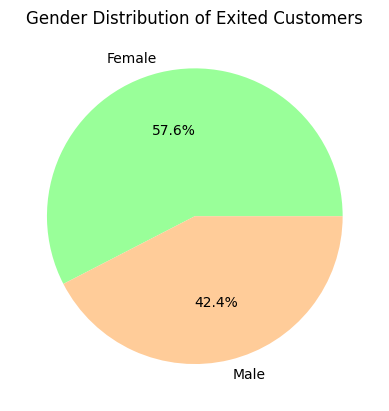

In [ ]:
# Filtering data 'Exited' == 1
exited_df = df[df['churn'] == 1]

# Plot pie chart
gender_counts_churn = exited_df['Gender'].value_counts()
plt.pie(gender_counts_churn, labels=gender_counts_churn.index, autopct='%1.1f%%', colors=['#99ff99', '#ffcc99'])
plt.title('Gender Distribution of Exited Customers')
plt.show()

Dari Plotting dibawah ini, terlihat bahwa lebih dari 50% nasabah dari German meninggalkan bank. dibandingkan dengan negara prancis dan spanyol yang Exited Ratenya kurang lebih 20% saja. Perlu menjadi pertanyaan besar mengapa banyak nasabah jerman yang meninggalkan bank. untuk menjawab pertanyaan ini saya membutuhkan data lebih lanjut seperti :
1. Data survei yang mengumpulkan feedback dari nasabah Jerman tentang pengalaman mereka dengan layanan bank, kepuasan terhadap produk dan layanan, serta harapan mereka terhadap kualitas pelayanan bank.

2. Analisis pola transaksi dan riwayat akun nasabah Jerman yang telah meninggalkan bank untuk memahami apakah ada pola atau tren tertentu yang mungkin menjadi penyebab mereka meninggalkan bank.

3. Informasi tentang demografi nasabah Jerman yang telah meninggalkan bank, termasuk usia, pendapatan, profesi, dan faktor-faktor lain yang mungkin memengaruhi keputusan mereka.

4. Melakukan studi pasar untuk memahami tren industri perbankan di Jerman, serta menganalisis layanan dan kebijakan persaingan dari bank-bank lain yang mungkin mempengaruhi keputusan nasabah.

5. Menganalisis segmentasi pelanggan di Jerman untuk memahami preferensi dan kebutuhan khusus dari segmen-segmen tertentu, dan bagaimana bank dapat mengakomodasi kebutuhan tersebut.

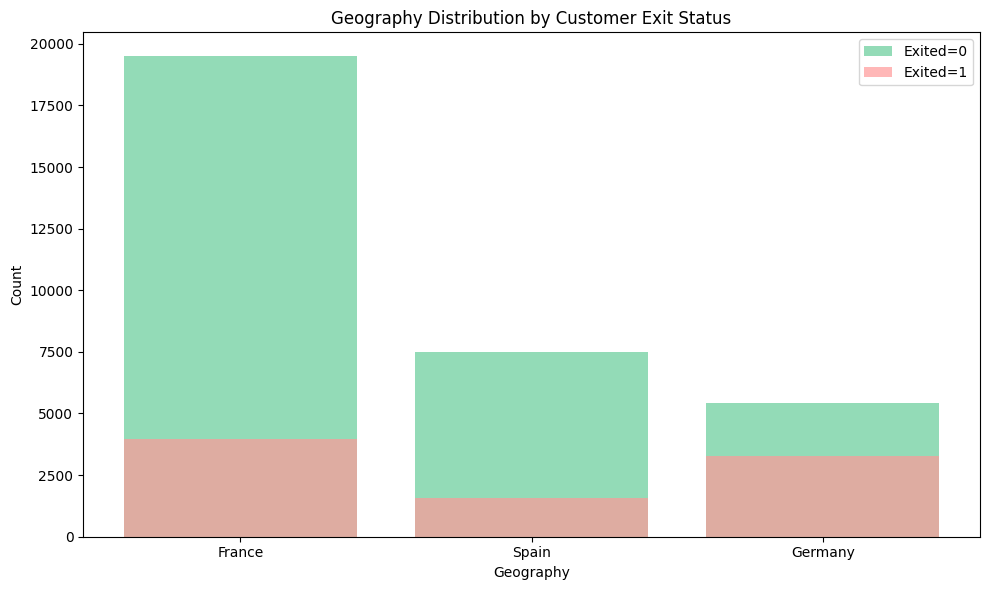

In [ ]:
# Filtering data 'churn' == 0
active_df = df[df['churn'] == 0]
# Filtering data 'churn' == 1
exited_df = df[df['churn'] == 1]

# Plot bar chart
geography_counts_active = active_df['Geography'].value_counts()
geography_counts_exited = exited_df['Geography'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(geography_counts_active.index, geography_counts_active.values, label='Exited=0', color='#66cc99', alpha=0.7)
plt.bar(geography_counts_exited.index, geography_counts_exited.values, label='Exited=1', color='#ff9999', alpha=0.7)
plt.title('Geography Distribution by Customer Exit Status')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.legend()
plt.tight_layout()
plt.show()

**Data Preprocessing**

Sebelum melakukan modelling, saya melakukan feature engineering pada beberapa kolom kategorik karena model hanya dapat menerima inputan numerik.
Untuk kolom 'unnamed: 0', 'if', 'CustomerId', 'Surname' karena tidak relevan dan tidak berpengaruh terhadap output (churn) saya memutuskan untuk drop keempat kolom tersebut. kolom Gender karena hanya ada 2 kemungkinan output saya lakukan binary encoding, sedangkan untuk kolom Geography karena hanya ada 3 value saya lakukan onehot ecoding dimana nantinya akan ada 3 kolom baru per masing-masing unique value dari kolom 'Geography'. Dengan demikian seluruh kolom sudah dalam bentuk numerik.

In [ ]:
#Drop Unrelated Features
df = df.drop(columns=['Unnamed: 0', 'id', 'CustomerId', 'Surname'])
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      41246 non-null  float64
 1   Geography        41258 non-null  object 
 2   Gender           41258 non-null  object 
 3   Age              41258 non-null  float64
 4   Tenure           41258 non-null  int64  
 5   Balance          41258 non-null  float64
 6   NumOfProducts    41258 non-null  int64  
 7   HasCrCard        41258 non-null  int64  
 8   IsActiveMember   41258 non-null  int64  
 9   EstimatedSalary  41258 non-null  float64
 10  churn            41258 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 3.5+ MB


In [ ]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,628.0,Spain,Female,50.0,4,160133.08,1,1,1,653.53,0
1,710.0,Spain,Male,34.0,8,0.00,2,1,1,72993.73,0


Setelah melakuakn feature engineering, saya akan melakukan splitting dataset kedalam 3 bagian yakni Train (80%) dan Test (20%). Pada dasarnya karena sebelumnya saya melakukan binary encoding dan one hot encoding pada sejumlah kolom, saya dapat melakukan splitting data baik sebelum atau sesudah feature engineering karena binary/one hot encoding tidak berpengaruh pada value selain dirinya sendiri.

In [ ]:
from sklearn.model_selection import train_test_split

#spliting dataset
X = df.drop(columns="churn")
y = df.churn

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y,random_state=42)

print(f"X_train : {X_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_test : {y_test.shape}")

X_train : (33006, 10)
y_train : (33006,)
X_test : (8252, 10)
y_test : (8252,)


In [ ]:
y_train.value_counts()

churn
0    25928
1     7078
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

churn
0    6482
1    1770
Name: count, dtype: int64

Feature Engineering

In [ ]:
#Binary Encoding
df_encode={"Gender": {"Male":1,"Female" :0}}
X_train=X_train.replace(df_encode)
X_test=X_test.replace(df_encode)

#One Hot Encoding
X_train=pd.get_dummies(X_train,columns=['Geography'])
X_test=pd.get_dummies(X_test,columns=['Geography'])

Impute Missing Value

Pada Exploratory Data sebelumnya, ditemukan sejumlah missing value pada kolom 'CreditScore'. Maka dari itu agar model dapat dibuat, maka nilai yang missing tersebut harus ditindak lanjuti baik menghapus data yang memiliki missing value ataupun me-replace nya dengan value lain. Dikarenakan jumlah missing value nya tidak banyak, maka saya memutuskan untuk mereplace nya dengan nilai rata-rata kolom 'CreditScore'. Agar tidak terjadi Data Leakage, maka saya mereplace nya dengan nilai mean dari data training agar data testing tidak bocor dalam proses training model. Setelah mendapat nilai mean dari X_train, saya gunakan value tersebut untuk mereplace missing value dalam dataset X_train dan juga X_test.

In [ ]:
X_train.isna().sum()

CreditScore          10
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Geography_France      0
Geography_Germany     0
Geography_Spain       0
dtype: int64

In [ ]:
X_test.isna().sum()

CreditScore          2
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [ ]:
#Find Mean of Credit score from X_train
X_train['CreditScore'].mean()

655.8149169596314

In [ ]:
#replace the mean value to X_train and X_test
X_train = X_train.fillna(656.8)
X_test = X_test.fillna(656.8)

In [ ]:
X_train.isna().sum()

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [ ]:
X_test.isna().sum()

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
dtype: int64

Langkah selanjutnya adalah menormalisasi data. untuk menormalisasi data karena untuk menormalkannya diperlukan value lain selain dirinya sendiri maka dilakukan setelah splitting. disini saya menggunakan 2 pendekatan scaler yakni Robust dan MinMax. saya melakukan scaling di semua kolom yang bukan binary. untuk kolom Age dan Credit Score karena saat explore data kedua kolom tersebut memiliki sejumlah outliers didalamnya, saya menggunakan pendekatan robust scaler dimana pendekatan robust dipengaruhi oleh median sehingga tidak terlalu terpengaruh oleh adanya outliers. Berbeda dengan kolom 'Balance' dan 'EstimatedSalary' dimana kedua kolom ini tidak memiliki outliers, saya melakukan scaling dengan pendekatan MinMax dimana nilai minimum dari kolom akan bernilai 0, dan nilai maximum dari kolom akan bernilai 1 dan nilai lain berada diantara 0 sampai 1.

In [ ]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

#Scaling with Robust for Age and Credit Score columns cuz they have many outliers value
X_train[['Age', 'CreditScore']] = robust_scaler.fit_transform(X_train[['Age', 'CreditScore']])
X_test[['Age', 'CreditScore']] = robust_scaler.transform(X_test[['Age', 'CreditScore']])

#Scaling with MinMax for Balance and Estimated Salary columns cuz they have no outliers value
X_train[['Balance', 'EstimatedSalary']] = minmax_scaler.fit_transform(X_train[['Balance', 'EstimatedSalary']])
X_test[['Balance', 'EstimatedSalary']] = minmax_scaler.transform(X_test[['Balance', 'EstimatedSalary']])


In [ ]:
X_train.head(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
310,0.592920,1,1.1,2,0.460917,1,1,0,0.863117,False,True,False
15994,0.451327,1,0.5,5,0.592490,2,0,0,0.399622,False,True,False


In [ ]:
X_test.head(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
987,-0.070796,1,0.0,4,0.00000,1,1,0,0.249099,True,False,False
18987,-0.973451,1,-1.1,10,0.47548,1,1,1,0.556206,False,True,False


# Modelling : Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_predict_RF = RF_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report RF\n')
print(classification_report(y_test, y_predict_RF))


Classification Report RF

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6482
           1       0.72      0.53      0.61      1770

    accuracy                           0.85      8252
   macro avg       0.80      0.74      0.76      8252
weighted avg       0.85      0.85      0.85      8252



Tuned Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,4,6,8],
}

In [ ]:
RF_model2 = RandomForestClassifier()

In [ ]:
RF_model2= GridSearchCV(RF_model2 ,
                            param_grid = parameters,
                            scoring='accuracy',
                            cv=5)

In [ ]:
RF_model2.fit(X_train,y_train)
print("Tuned Hyperparameters :", RF_model2.best_params_)
print("Accuracy :",RF_model2.best_score_)

Tuned Hyperparameters : {'criterion': 'gini', 'max_depth': 8}
Accuracy : 0.8617827405457235


In [ ]:
RF_model_best = RandomForestClassifier(criterion= 'gini',max_depth=8)
RF_model_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=8)

In [ ]:
y_predict_best=RF_model_best.predict(X_test)

In [ ]:
print('\nClassification Report Best RF\n')
print(classification_report(y_test, y_predict_best))


Classification Report Best RF

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6482
           1       0.78      0.50      0.61      1770

    accuracy                           0.86      8252
   macro avg       0.83      0.73      0.76      8252
weighted avg       0.86      0.86      0.85      8252



In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_proba = RF_model_best.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print("Nilai AUC:", auc_score)

Nilai AUC: 0.8875075611384503


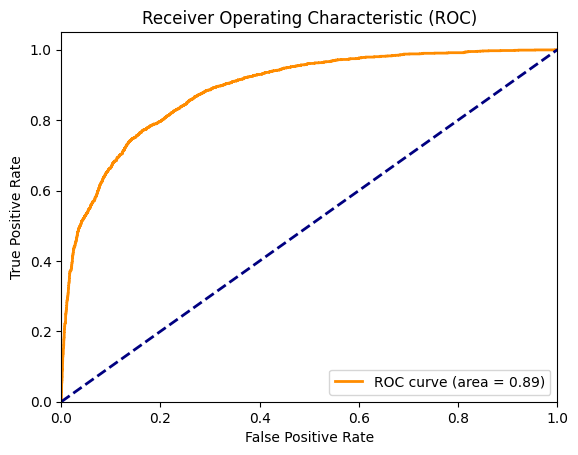

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_proba = RF_model_best.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Modelling : XGBoost

In [ ]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Melatih model
model_xgb.fit(X_train, y_train)

# Memprediksi data uji
y_pred = model_xgb.predict(X_test)

In [ ]:
print('\nClassification Report XGB\n')
print(classification_report(y_test, y_pred))


Classification Report XGB

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6482
           1       0.70      0.55      0.61      1770

    accuracy                           0.85      8252
   macro avg       0.79      0.74      0.76      8252
weighted avg       0.84      0.85      0.85      8252



In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Mencari parameter terbaik menggunakan GridSearchCV
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
print("Tuned Parameter:", grid_search.best_params_)

Tuned Parameter: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [ ]:
c
model_xgb_best = xgb.XGBClassifier(objective='binary:logistic',learning_rate= 0.1, max_depth= 3, n_estimators= 200, random_state=42)

# Melatih model
model_xgb_best.fit(X_train, y_train)

# Memprediksi data uji
y_pred = model_xgb_best.predict(X_test)

In [ ]:
print('\nClassification Report Best XGB\n')
print(classification_report(y_test, y_pred))


Classification Report Best XGB

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6482
           1       0.73      0.54      0.62      1770

    accuracy                           0.86      8252
   macro avg       0.81      0.74      0.77      8252
weighted avg       0.85      0.86      0.85      8252



In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_proba = model_xgb_best.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print("Nilai AUC:", auc_score)

Nilai AUC: 0.8889797823438046


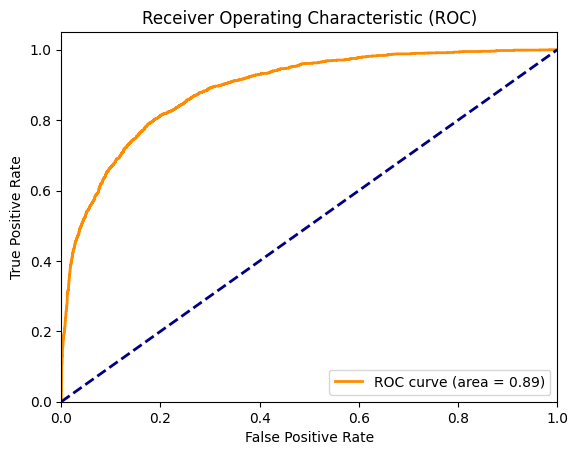

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_proba = model_xgb_best.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

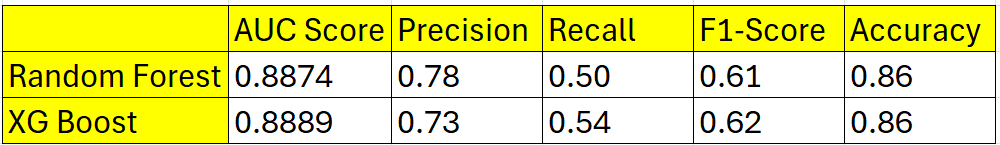

#Model Analysis :

Model Selection :     
Untuk pemilihan model sebenarnya tergantung pada kebutuhan dari case masing-masing. Pemilihan dapat dilihat berdasarkan performance metrics seperti accuracy, recall, dan precision. Seperti yang sudah dikatakan tadi bahwa ketiga model memiliki accuracy yang tidak jauh berbeda dan seluruhnya tergolong baik. Akan tetapi selain dari accuracy, perlu diperhatikan juga rate dari precision dan recall nya. Nilai precision yang tinggi dibutuhkan untuk meminimalisir segala prediksi dari model kita yang bernilai positif, akan tetapi pada kenyataanya bernilai negative (False Positive), sedangkan rate recall yang tinggi digunakan untuk meminimalisir nilai yang kita prediksi bernilai negative, akan tetapi pada kenyataanya bernilai positif (False Negative).

Pemilihan metric Precision ataupun Recall dapat dipertimbangkan dalam beberapa hal yang menjadi concern pemilihan metric. Pemilihan ini tergantung pada objectif pihak bank. Misalnya :
1. Jika tingkat pelanggan yang churn tinggi (relatif dari masing-masing bank), saya akan memilih untuk memaksimalkan recall. Ini akan memastikan bahwa model menemukan sebagian besar pelanggan yang benar-benar akan churn, bahkan jika itu berarti ada beberapa false positive. Dengan ini pihak bank dapat menemukan strategi untuk menekan angka churn tersebut dengan meilihat pola pola pelanggan yang churn.

2. Jika sumber daya untuk retensi terbatas dan pihak bank ingin memastikan bahwa setiap upaya yang dilakukan memiliki dampak yang signifikan, saya lebih memilih untuk memaksimalkan precision. Ini akan meminimalkan jumlah pelanggan yang salah dianggap sebagai calon churn, sehingga Anda dapat mengalokasikan sumber daya dengan lebih efisien.

Dalam case Churn Bank yang saya gunakan saya harus mempertimbangkan keduanya karena model yang ingin saya bangun harus dapat mengurangi false negative dimana model gagal memprediksi bahwa seorang pelanggan akan churn tetapi sebenarnya pelanggan tersebut tidak churn maupun false positif dimana model gagal memprediksi bahwa seorang pelanggan tidak churn tetapi sebenarnya pelanggan tersebut churn. Metric yang dapat menggambarkan kedua nilai ini adalah F1 Score.

Jika dilihat memang kedua model yang telah di tuning ini memiliki performa yang kurang lebih sama baiknya. Kedua model baik XGBoost maupun Random Forest menunjukan performa yang baik dari nilai AUC (88%) nya yang berarti model tidak secara kebetulan benar dalam melakukan prediksi. Karena dalam dataset terdapat imbalance data dimana data pelanggan churn jauh lebih sedikit daripada data pelanggan tetap, maka saya tidak bisa menggunakan nilai akurasi sebagai acuan karena dapat mengakibatkan missleading. F1 score dari model XGBoost memiliki performa yang lebih baik sebesar 1% dari model Random Forest. karena saya lebih mengacu pada pendekatan F1 score sebagai metric evaluasi maka XGBoost **saya lebih prefer untuk memilih model XGBoost** daripada Random Forest secara performanya terhadap data testing.

Save Model as a Pickle

In [ ]:
import pickle as pkl
filename = 'BestModel_XGB.pkl'
pkl.dump(model_xgb_best, open(filename, 'wb'))